In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

In [10]:
df = pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

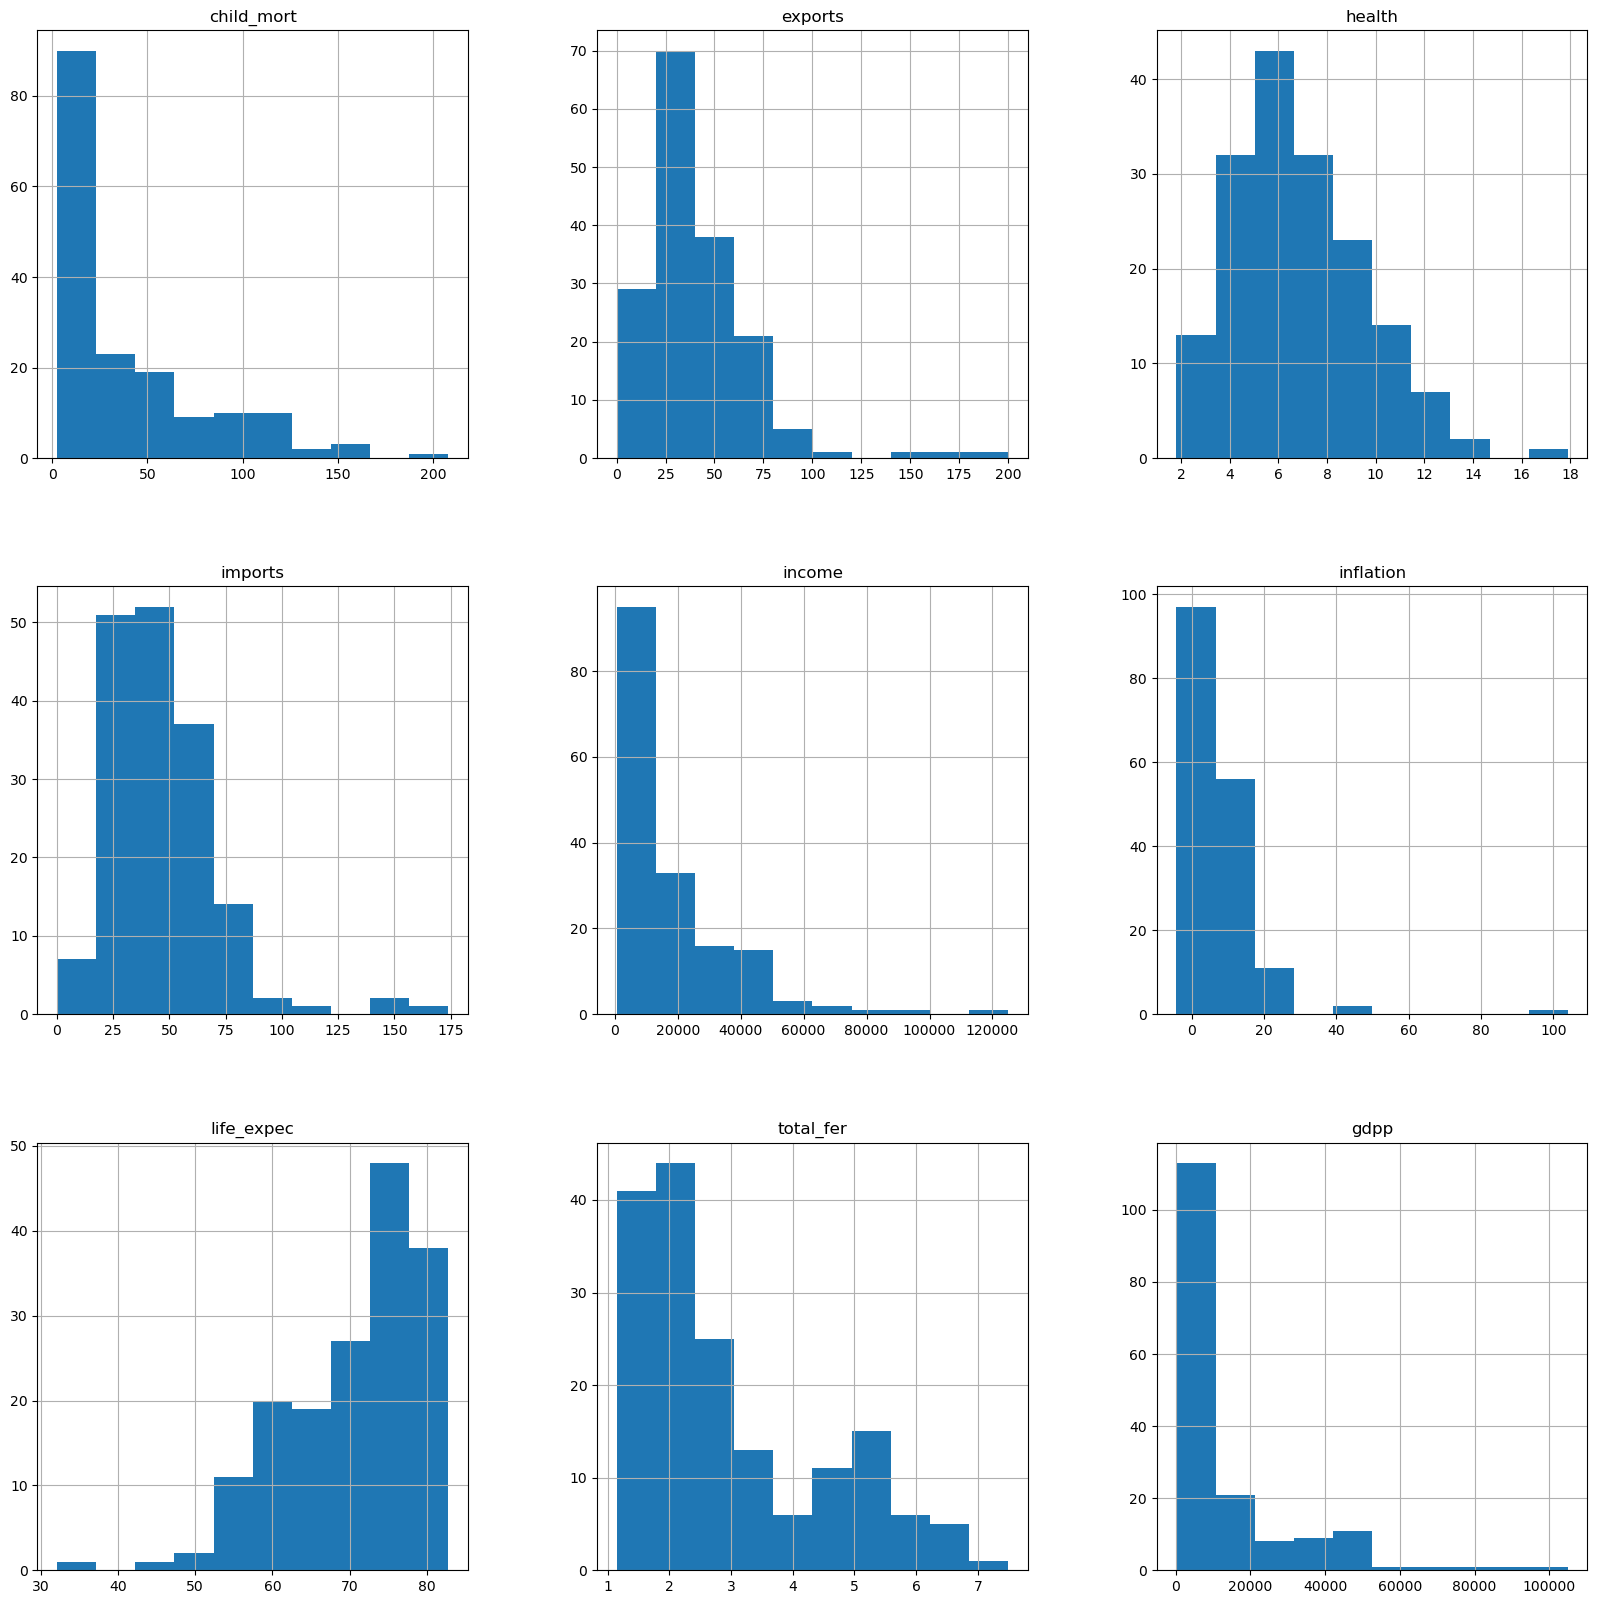

In [14]:
df.hist(figsize = (20,20))

In [4]:
warnings.filterwarnings("ignore")

X = df.drop(columns=["country"])
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

k_values = [3, 5, 7, 11, 13, 15]

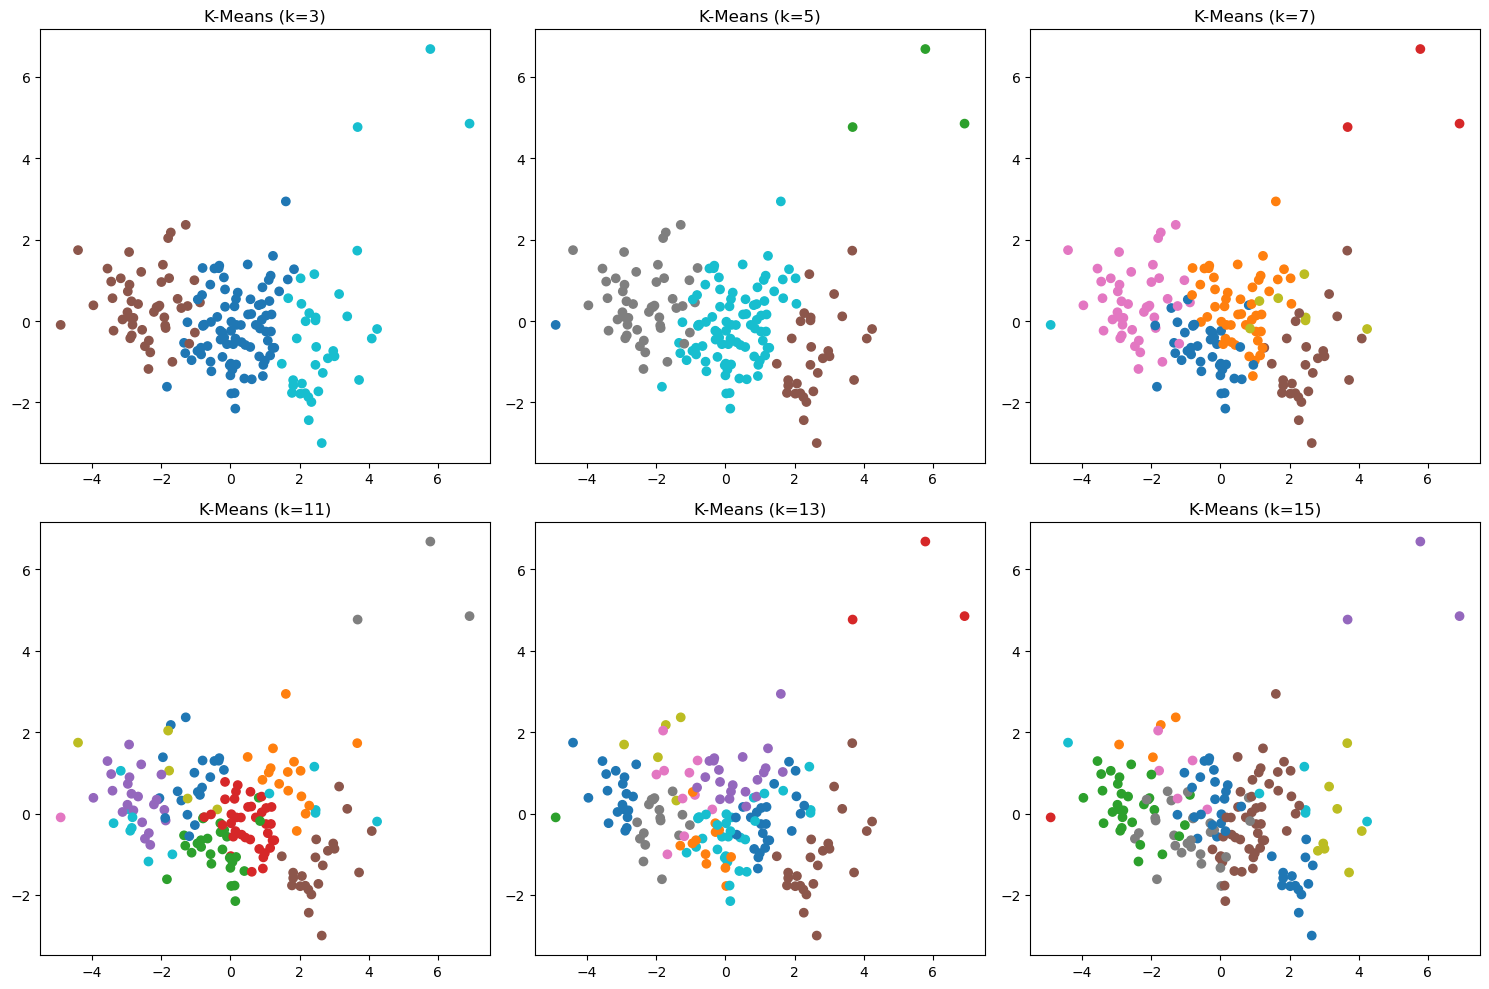

In [5]:
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    plt.subplot(2, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
    plt.title(f'K-Means (k={k})')
plt.tight_layout()
plt.show()

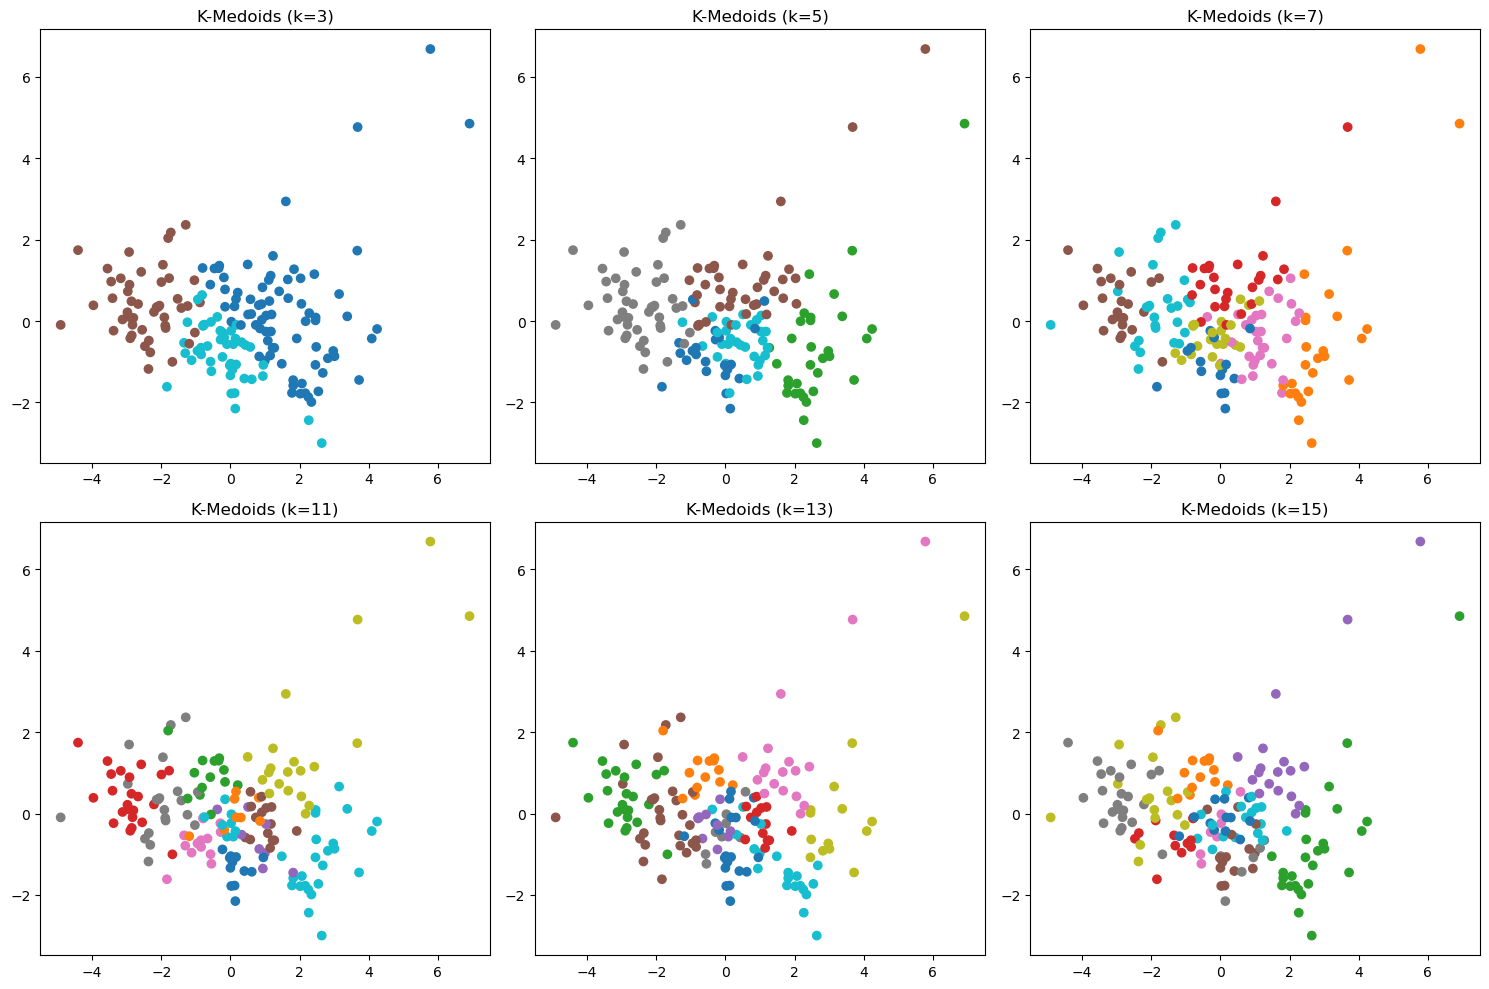

In [6]:
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    kmedoid = KMedoids(n_clusters=k, random_state=0)
    labels = kmedoid.fit_predict(X_scaled)
    plt.subplot(2, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
    plt.title(f'K-Medoids (k={k})')
plt.tight_layout()
plt.show()

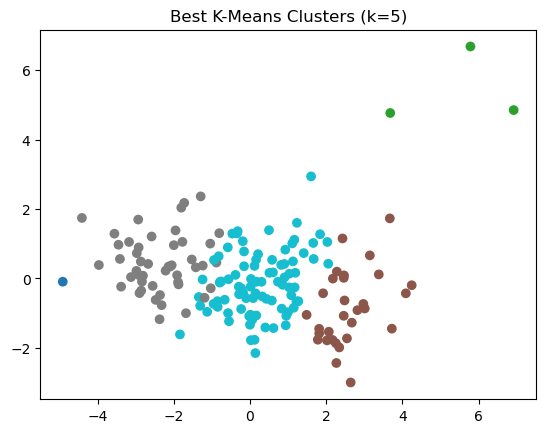

In [7]:
best_k = 5
kmeans_best = KMeans(n_clusters=best_k, random_state=0, n_init=10)
labels_best = kmeans_best.fit_predict(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_best, cmap='tab10')
plt.title(f'Best K-Means Clusters (k={best_k})')
plt.show()

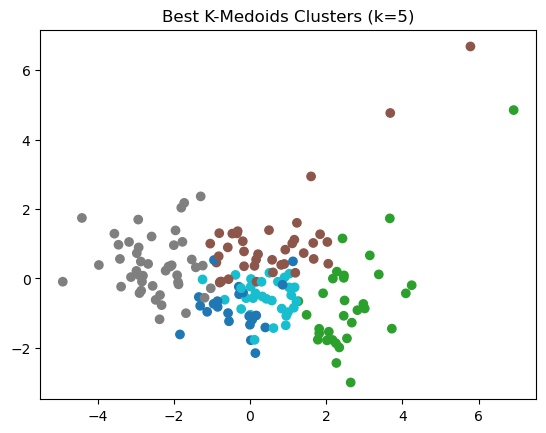

In [8]:
kmedoid_best = KMedoids(n_clusters=best_k, random_state=0)
labels_best = kmedoid_best.fit_predict(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_best, cmap='tab10')
plt.title(f'Best K-Medoids Clusters (k={best_k})')
plt.show()